# Lab 8: EM for k-means

[k-means](https://en.wikipedia.org/wiki/K-means_clustering) is a commonly used clustering algorithm. The training is fairly straightforward, and can be spilt up into two parts. Your task for today is to implement these parts and find reasonable groupings for a set of data.

In [ ]:
import numpy as np                          # vectors etc
import matplotlib.pyplot as plt             # for plotting
np.random.seed(0)                           # Ensures we get the same 'random' data every time

Now for creating the data.

In [ ]:
X = np.random.multivariate_normal([0, 0], [[4, 0],[0, 4]], size=200)
y = [0]*X.shape[0]
X = np.concatenate([X, np.random.multivariate_normal([5, 3], [[1, 0],[0, 1]], size=100)])
y.extend([1]*(X.shape[0]-len(y)))
X = np.concatenate([X, np.random.multivariate_normal([-3, 8], [[1, 0],[0, 1]], size=50)])
y.extend([2]*(X.shape[0]-len(y)))
y = np.asarray(y)
X.shape, y.shape

((350, 2), (350,))

New need to choose the number of clusters and set up a data structure for the model.

In [ ]:
n_clusters = 3

model = {'centres': None,
         'class_attributions': None}

Plotting is nice.

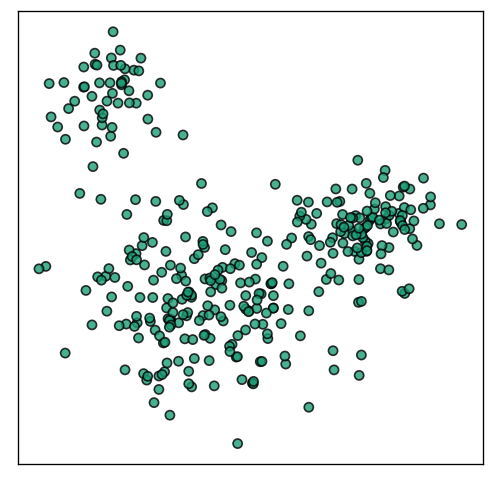

In [ ]:
def plot_clustering(X, clusters=None):
  plt.figure(figsize=(5, 5), dpi=120)
  if clusters is not None and clusters['class_attributions'] is not None:
    y = clusters['class_attributions']
  else:
    y = np.zeros(X.shape[0])
  plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap='Dark2', alpha=.8)
  if clusters is not None and clusters['centres'] is not None:
    plt.scatter(clusters['centres'][:, 0], clusters['centres'][:, 1], 
                c=np.arange(clusters['centres'].shape[0]), s=200, marker='x', linewidth=3, cmap='Dark2', zorder=1)
  plt.xticks([])
  plt.yticks([])
  plt.show()

plot_clustering(X)

# k-means training

## Initialization of model parameters

We need some cluster centres to start with. There are clever ways of choosing these, but for today, we will simply randomize the starting points.

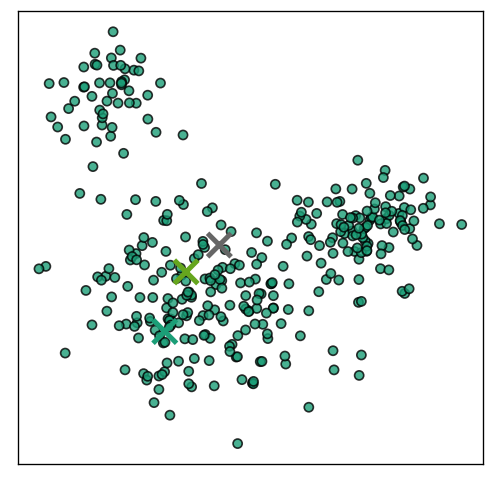

In [ ]:
model['centres'] = np.random.normal(size=(n_clusters, X.shape[1]))

plot_clustering(X, model)

## Find cluster label attributions

Given some cluster centres, all points can given a cluster label. Each point in the data set should be given the label of the closest cluster centre.

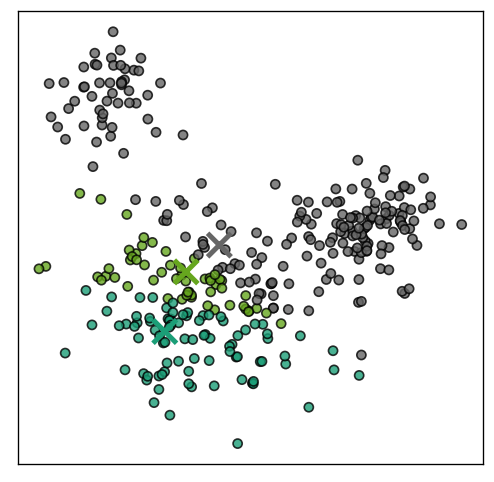

0.38571428571428573


In [ ]:
# ...

plot_clustering(X, model)

## Calculate new clusters

The mean of all the points belonging to a cluster is the new centre.

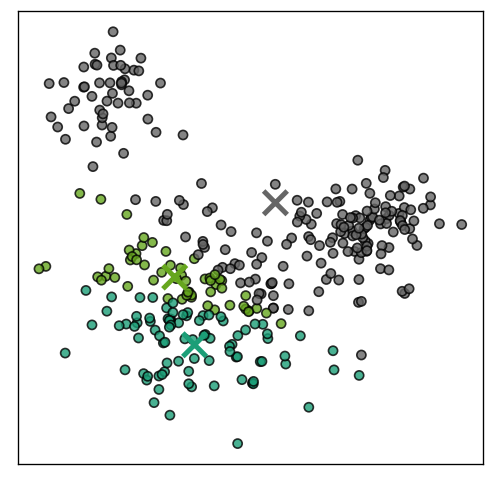

In [ ]:
# ...

plot_clustering(X, model)

Iteratively running the two previous sections will given you the final clustering.

Try changing the data and the number of clusters to what happens. If you are sure of that your training code is correct, you can put it in a for loop and only focus on the final result.